In [101]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
f_path = "C:/Users/NOE/Desktop/Dadas counts/modelo 3"
file_paths = glob.glob(f_path + "/*.mat")

models = []
solutions = []
times = []

for file_path in file_paths:
    model = cobra.io.load_matlab_model(file_path)
    model.id = os.path.splitext(os.path.basename(file_path))[0].replace("_", "-")
    
    t0 = time.time()  
    model.objective = 'biomass_maintenance'
    solution = cobra.flux_analysis.pfba(model) # cobra.flux_analysis.parsimonious.pfba
    t = time.time()  
    pfba_time = t - t0
    
    print(f"The simulation of {model.id} fluxes takes: {pfba_time} seconds")
    
    models.append(model)
    solutions.append(solution)
    times.append(pfba_time)

No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


The simulation of IGTModel-GSM5009231-DP005 fluxes takes: 3.1010594367980957 seconds


No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


The simulation of IGTModel-GSM5009237-DP013 fluxes takes: 1.6816530227661133 seconds


No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


The simulation of IGTModel-GSM5009241-DP025 fluxes takes: 2.524136543273926 seconds


No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


The simulation of IGTModel-GSM5009249-DP048 fluxes takes: 1.7450382709503174 seconds


No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


The simulation of IGTModel-GSM5009251-DP051 fluxes takes: 1.7534210681915283 seconds


No defined compartments in model ContextModel_ND. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


The simulation of NDModel-GSM5009234-DP010 fluxes takes: 1.7549011707305908 seconds


No defined compartments in model ContextModel_ND. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


The simulation of NDModel-GSM5009236-DP012 fluxes takes: 1.7273361682891846 seconds


No defined compartments in model ContextModel_ND. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


The simulation of NDModel-GSM5009239-DP019 fluxes takes: 1.839637279510498 seconds


No defined compartments in model ContextModel_ND. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


The simulation of NDModel-GSM5009252-DP052 fluxes takes: 1.819460153579712 seconds


No defined compartments in model ContextModel_ND. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


The simulation of NDModel-GSM5009254-DP054 fluxes takes: 1.771439552307129 seconds


In [103]:
fluxes_df = pd.DataFrame(index = [model.id for model in models])
fluxes_df

""
IGTModel-GSM5009231-DP005
IGTModel-GSM5009237-DP013
IGTModel-GSM5009241-DP025
IGTModel-GSM5009249-DP048
IGTModel-GSM5009251-DP051
NDModel-GSM5009234-DP010
NDModel-GSM5009236-DP012
NDModel-GSM5009239-DP019
NDModel-GSM5009252-DP052
NDModel-GSM5009254-DP054


In [104]:

fluxes_df = pd.DataFrame(index = [model.id for model in models])

for i, solution in enumerate(solutions, start = 0):
    fluxes = solution.fluxes
    
    for reaction, flux in fluxes.items():
        if reaction not in fluxes_df.columns:
            fluxes_df[reaction] = 0.0
        
        fluxes_df.at[fluxes_df.index[i], reaction] = flux
        

fluxes_df.head()

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaction] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_24076\3539606871.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

,13DAMPPOX,2HBO,2HCO3_NAt,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,34DHPHEt,34DHPLACOX_NADP_,...,IVCOAACBP,IVCRNe,r1667,3MGLUTACc,3MGLUTACtm,3MGLUTACte,EX_3mglutac[e],HMR_3832,ATVLACThc,sink_lys_L[c]
IGTModel-GSM5009231-DP005,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel-GSM5009237-DP013,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel-GSM5009241-DP025,0.0,0.0,0.0,8.707922e-14,8.707922e-14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel-GSM5009249-DP048,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel-GSM5009251-DP051,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [106]:
t_fluxes_df = fluxes_df.applymap(flux_transformer)
t_fluxes_df

,13DAMPPOX,2HBO,2HCO3_NAt,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,34DHPHEt,34DHPLACOX_NADP_,...,IVCOAACBP,IVCRNe,r1667,3MGLUTACc,3MGLUTACtm,3MGLUTACte,EX_3mglutac[e],HMR_3832,ATVLACThc,sink_lys_L[c]
IGTModel-GSM5009231-DP005,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
IGTModel-GSM5009237-DP013,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
IGTModel-GSM5009241-DP025,0,0.0,0,2.512435e-13,2.512435e-13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
IGTModel-GSM5009249-DP048,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
IGTModel-GSM5009251-DP051,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
NDModel-GSM5009234-DP010,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
NDModel-GSM5009236-DP012,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
NDModel-GSM5009239-DP019,0,0.0,0,-3.286260e-13,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
NDModel-GSM5009252-DP052,0,-0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
NDModel-GSM5009254-DP054,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-6.377857


In [107]:
from scipy import stats
from statsmodels.stats import multitest
import seaborn as sns

In [111]:
l_samples = t_fluxes_df.head(5)
h_samples = t_fluxes_df.tail(5)
l_samples

,13DAMPPOX,2HBO,2HCO3_NAt,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,34DHPHEt,34DHPLACOX_NADP_,...,IVCOAACBP,IVCRNe,r1667,3MGLUTACc,3MGLUTACtm,3MGLUTACte,EX_3mglutac[e],HMR_3832,ATVLACThc,sink_lys_L[c]
IGTModel-GSM5009231-DP005,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
IGTModel-GSM5009237-DP013,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
IGTModel-GSM5009241-DP025,0,0.0,0,2.512435e-13,2.512435e-13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
IGTModel-GSM5009249-DP048,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
IGTModel-GSM5009251-DP051,0,0.0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [121]:
t_statistic, p_values = stats.ttest_ind(h_samples, l_samples, axis = 0, nan_policy = 'omit')
fold_change = np.log2(np.mean(h_samples, axis = 0)) - np.log2(np.mean(l_samples, axis = 0))
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject, q_values = multitest.fdrcorrection(p_values)

t_results = pd.DataFrame({
    'reaction': t_fluxes_df.columns,
    'p_value': p_values,
    'q_value': q_values,
    'log_fc': fold_change
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['log_fc'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['log_fc'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_fluxes_sign = t_results[t_results['sign'] != 'NO SIGNIFICANCE']
t_fluxes_sign

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,reaction,p_value,q_value,log_fc,sign
13DAMPPOX,13DAMPPOX,1.000000,1.0,0.0,NORMAL
2HBO,2HBO,1.000000,1.0,0.0,NORMAL
2HCO3_NAt,2HCO3_NAt,1.000000,1.0,0.0,NORMAL
2OXOADOXm,2OXOADOXm,0.198564,1.0,0.0,NORMAL
2OXOADPTm,2OXOADPTm,0.346594,1.0,-inf,NORMAL
...,...,...,...,...,...
3MGLUTACte,3MGLUTACte,1.000000,1.0,0.0,NORMAL
EX_3mglutac[e],EX_3mglutac[e],1.000000,1.0,0.0,NORMAL
HMR_3832,HMR_3832,1.000000,1.0,0.0,NORMAL
ATVLACThc,ATVLACThc,1.000000,1.0,0.0,NORMAL


In [122]:
t_fluxes_sign

,reaction,p_value,q_value,log_fc,sign
13DAMPPOX,13DAMPPOX,1.000000,1.0,0.0,NORMAL
2HBO,2HBO,1.000000,1.0,0.0,NORMAL
2HCO3_NAt,2HCO3_NAt,1.000000,1.0,0.0,NORMAL
2OXOADOXm,2OXOADOXm,0.198564,1.0,0.0,NORMAL
2OXOADPTm,2OXOADPTm,0.346594,1.0,-inf,NORMAL
...,...,...,...,...,...
3MGLUTACte,3MGLUTACte,1.000000,1.0,0.0,NORMAL
EX_3mglutac[e],EX_3mglutac[e],1.000000,1.0,0.0,NORMAL
HMR_3832,HMR_3832,1.000000,1.0,0.0,NORMAL
ATVLACThc,ATVLACThc,1.000000,1.0,0.0,NORMAL


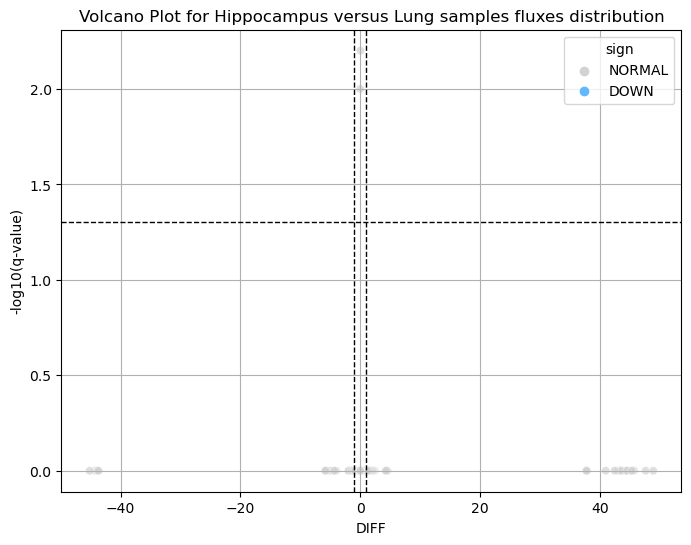

In [123]:
colors = {"NORMAL":"#D2D2D2", "UP":"#FF6462", "DOWN":"#62B8FF"}
plt.figure(figsize = (8, 6))

sns.scatterplot(x = t_results['log_fc'], y = -np.log10(t_results['q_value']), hue = t_results['sign'], palette = colors, alpha = 0.7)
plt.axhline(-np.log10(0.05), color = 'k', linestyle = '--', linewidth = 1, label = 'THRESHOLD')
plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(-1, color = 'k', linestyle = '--', linewidth = 1)


plt.xlabel('DIFF')
plt.ylabel('-log10(q-value)')
plt.title('Volcano Plot for Hippocampus versus Lung samples fluxes distribution')


plt.grid(True)
